# Linear Regression Project



## Imports

Import pandas, numpy, matplotlib, and seaborn. Set %matplotlib inline.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:

customers = pd.read_csv(r"C:\Users\raviv\AI\MACHINE LEARNING\Ecommerce Customers.csv")

Check the head(), info(), and describe() of the DataFrame.

In [57]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [58]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [59]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Training and Testing Data

Set X equal to the features data, and Y to the data to be predicted by our model. The model will train on 70% of the data, and 30% of the data will be used to test the predictions.

In [60]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

In [61]:
Y = customers["Yearly Amount Spent"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train, Y_train)

LinearRegression()

In [67]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


(350, 4)
(350,)


ValueError: x and y must be the same size

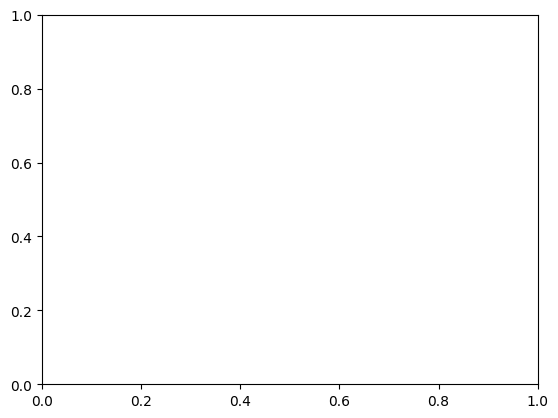

In [69]:
# Predict the target for the training data
y_pred = lm.predict(X_train)
print(X_train.shape)
print(Y_train.shape)
# Plotting the training data
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

# Plotting the fitted line
plt.plot(X_train, y_pred, color='red', label='Fitted Line')

plt.title('Training Data and Fitted Line')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

## Predict Test Data

With our fitted model we'll evaluate the performance predicting test values.

In [34]:
predictions = lm.predict(X_test)


ValueError: x and y must have same first dimension, but have shapes (350, 4) and (150,)

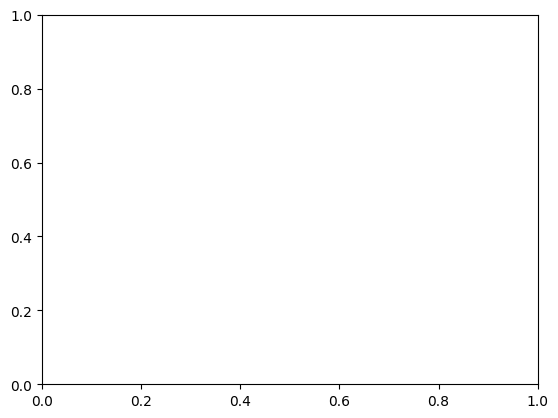

Text(0.5, 0, 'Y Test')

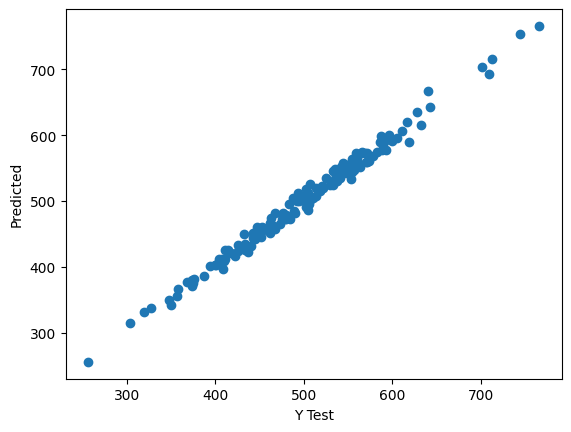

In [25]:
plt.pyplot.scatter(Y_test, predictions)
plt.pyplot.ylabel("Predicted")
plt.pyplot.xlabel("Y Test")

## Evaluate The Model

Evaluate the model by calculating the residual sum of squares and the explained variance score. (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error). Plot a histogram of the residuals to ensure a normal distribution.

In [26]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, predictions))))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


In [29]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Conclusion

The greater the coefficient, the more related it is to it's target, yearly amount spent. The company should focus on the mobile app over the website and membership retention as they are more related to the target.